In [61]:
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Part 1**: Download and read the csv file

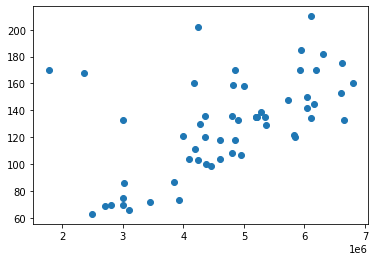

In [62]:
dfraw = pd.read_csv('datasets/data_assignment2.csv')

#Show an overview of the data before making a linear regression
plt.scatter(dfraw['Selling_price'],dfraw['Living_area'])

## **a**)
Find a linear regression model that relates the living area to the selling price. 
If you did any data cleaning step(s), describe and explain why you did that. 

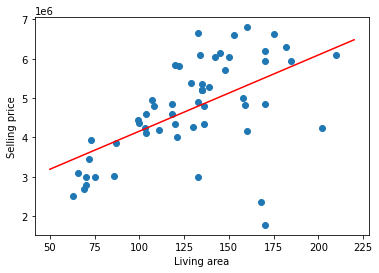

In [63]:
# Chose the right columns for the model
x_area = dfraw.loc[:,['Living_area']].values
y_selling = dfraw['Selling_price'].values
 
# Create an linear regression model and fit it
model = LinearRegression().fit(x_area,y_selling)

x_fit = np.array([50,220])
y_fit = model.predict(x_fit[:,np.newaxis])

# Plotting the model
plt.scatter(x_area,y_selling)
plt.plot(x_fit,y_fit,color='red')

plt.xlabel("Living area")
plt.ylabel("Selling price")

plt.show()



As the plot shows there are some extreme points that can be outliers. These could skew the data, making it harder for the model to predict further data. Even if they are proper values and not errors, one could argue that the make the model less accurate. Therefore, we chose to remove them so illustrate the differences. We originally wanted to remove the points that are 3 std or higher, however there were no such points. Therefore, we chose 2 std or higher, this was mainly to illustrate the point of outliers even if one could argue that in this case, there are no outliers.

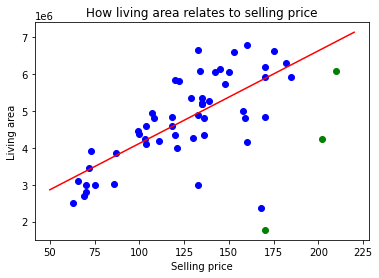

In [64]:
# Getting the mean and std
x_mean = dfraw['Living_area'].mean()
y_mean = dfraw['Selling_price'].mean()
x_2std = dfraw['Living_area'].std()*2
y_2std = dfraw['Selling_price'].std()*2

df_area = dfraw['Living_area']
df_price = dfraw['Selling_price']

# Creating two dataframes, one with the outliers and one without
df_outlier = dfraw[((df_area > x_mean + x_2std) | (df_area < x_mean - x_2std) |(df_price > y_mean + y_2std) | (df_price < y_mean - y_2std))]
df_cleaned = dfraw[((df_area < x_mean + x_2std) & (df_area > x_mean - x_2std) & (df_price < y_mean + y_2std) & (df_price > y_mean - y_2std))]

# Simliarly to before we get the relevant data and created a model
x_area = df_cleaned.loc[:,['Living_area']].values
y_selling = df_cleaned['Selling_price'].values

x_area_outlier = df_outlier.loc[:,['Living_area']].values
y_selling_outlier = df_outlier['Selling_price'].values
 
model2 = LinearRegression().fit(x_area,y_selling)

xfit = np.array([50,220])
yfit = model2.predict(xfit[:,np.newaxis])

plt.scatter(x_area,y_selling, color='blue')
plt.scatter(x_area_outlier,y_selling_outlier, color='green')
plt.plot(xfit,yfit,color='red')

plt.xlabel("Selling price")
plt.ylabel("Living area")
plt.title("How living area relates to selling price")

plt.show()

Here we can see that 3 outliers were detected, and that the regression line adjusted appropriately.

## **b**) 
What are the values of the slope and intercept of the regression line?


In [65]:
#Slope of the line:
print('Slope of the line is:', model2.coef_)

#Intercept of the line:
print('Intercept at:',  model2.intercept_)


Slope of the line is: [25160.26380939]
Intercept at: 1606573.8212559996


## **c)**
Use this model to predict the selling prices of houses which have living area 
100 m2, 150 m2 and 200 m2. 

In [66]:
# Create an array with the values chosen
values = np.asarray([100,150,200])

# Let the model predict the selling prices at those points
value = model.predict(values[:,np.newaxis])

print('Selling price at 100 m^2:', int(value[0]) )
print('Selling price at 159 m^2:', int(value[1]) )
print('Selling price at 200 m^2:', int(value[2]) )

Selling price at 100 m^2: 4157617
Selling price at 159 m^2: 5126124
Selling price at 200 m^2: 6094630


## **d**)
Draw a residual plot.

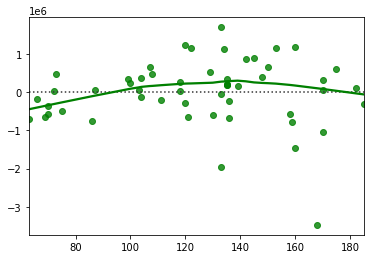

In [67]:
# Using seaborn a residual plot was created
sns.residplot(x=x_area,y=y_selling, lowess=True, color="g")

plt.show()

## **e**) 
Discuss the results, and how the model could be improved.

Slope of the line is (original): [19370.13854733]
Slope of the line is (modified): [25160.26380939]
Intercept at (original): 2220603.243355869
Intercept at (modified): 1606573.8212559996


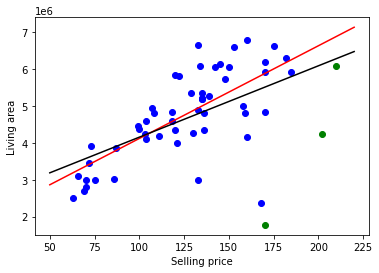

In [68]:
plt.scatter(x_area,y_selling, color='blue')
plt.scatter(x_area_outlier,y_selling_outlier, color='green')
plt.plot(xfit,yfit,color='red')
plt.plot(x_fit,y_fit,color='black')

plt.xlabel("Selling price")
plt.ylabel("Living area")



#Slope of the lines:
print('Slope of the line is (original):', model.coef_)
print('Slope of the line is (modified):', model2.coef_)

#Intercept of the lines:
print('Intercept at (original):',  model.intercept_)
print('Intercept at (modified):',  model2.intercept_)

By removing outliers, we can see that the regression lines slope shifts and intercepts at different point. Depending on the selling price/living area one wants to predict, these two different lines can give different predictions. It is hard to show which one is better than the other without using test data but it illustrates how difficult it is to choose which points are outliers and which are not.

In [69]:
# Create an array with the values chosen
values2 = np.asarray([75, 100, 150,200])

# Let the model predict the selling prices at those points
value1 = model.predict(values2[:,np.newaxis])
value2 = model2.predict(values2[:,np.newaxis])
model_type = ['model', 'model2']

print('Selling price at 75 m^2:', ('Original:'), int(value1[0]), ('Modified:'), int(value2[0]) )
print('Selling price at 100 m^2:', ('Original:'), int(value1[1]), ('Modified:'), int(value2[1]) )
print('Selling price at 150 m^2:', ('Original:'), int(value1[2]), ('Modified:'), int(value2[2]) )
print('Selling price at 200 m^2:', ('Original:'), int(value1[3]), ('Modified:'), int(value2[3]) )

Selling price at 75 m^2: Original: 3673363 Modified: 3493593
Selling price at 100 m^2: Original: 4157617 Modified: 4122600
Selling price at 150 m^2: Original: 5126124 Modified: 5380613
Selling price at 200 m^2: Original: 6094630 Modified: 6638626


As a final note: As the code above illustrates. The predictions can be extremely close or far apart depending on the selling price chosen

## **Part 2**:  In this question, you will use the Iris data set (“from sklearn.datasets import load_iris”)

## **a**)
Use a confusion matrix to evaluate the use of logistic regression to classify the 
iris data set

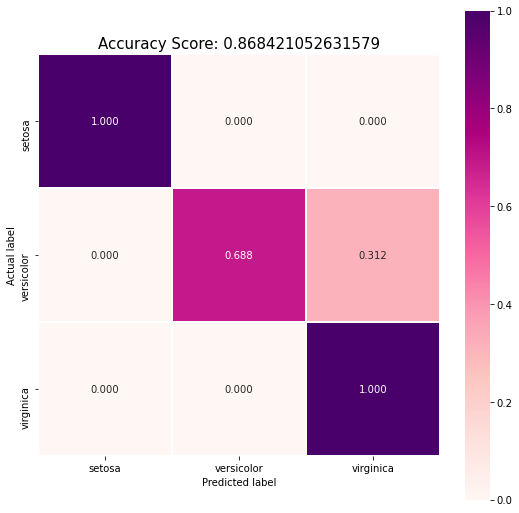

In [70]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Create the df from load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Splits it into test and traing with a test of 25% of the total
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.25)
class_names = iris.target_names

# Creates, predicts and create a accuracy score of t he model
model = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train,y_train)

score = model.score(X_test, y_test)
predic = model.predict(X_test)

#Create a confusion matrix and plots it
cm = confusion_matrix(y_test, predic, normalize = 'true')

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )
ax.set_xticklabels(iris.target_names)
ax.set_yticklabels(iris.target_names)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(all_sample_title, size = 15)


plt.show()


As the confusion matrix shows the accuracy is 87%. Both setosa and virginica can be predicted with 100% accuracy, however versicolor is not as accurate, only at 69%

## **b**)
Use k-nearest neighbours to classify the iris data set with some different 
values for k, and with uniform and distance-based weights. What will happen 
when k grows larger for the different cases? Why?

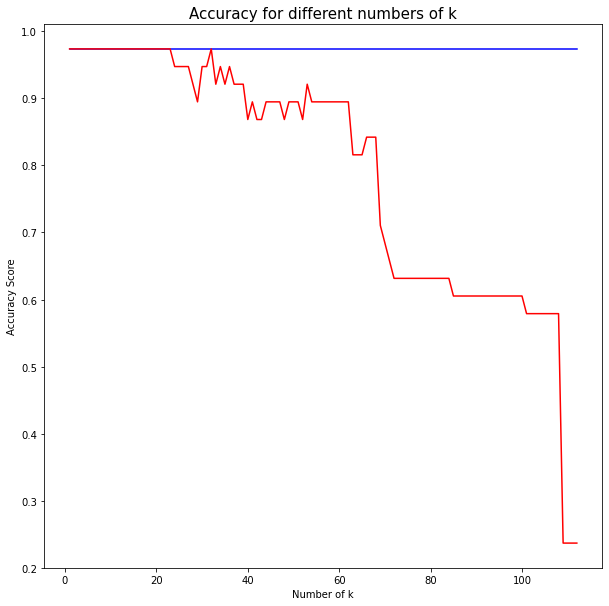

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Creating a for loop that create a plot with different weight and k to illustrate what happens when k grows larger and how it differes between 'distance' and 'uniform'
plt.figure(figsize=(10,10))
l = list(range(1, 113))
for weight in ['distance','uniform']:
    accuracy_score = [] 
    for i in l:
         #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=i,weights=weight ) 

        #Train the model using the training sets
        knn.fit(X_train, y_train)

        #Predict the response for test dataset
        y_pred = knn.predict(X_test)

        # Model Accuracy, how often is the classifier correct?
        accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
        
    if weight == 'uniform':
        plt.plot(l,accuracy_score, label = 'Uniform weight', color = 'red')
    else:
        plt.plot(l,accuracy_score, label = 'Distance weight', color = 'blue')

plt.xlabel('Number of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy for different numbers of k', size = 15)

plt.show()

As the plot illustrates the distance based weight gives a linear and high accuracy for every k. Uniform based however differs greatly depending on k. Distance based is probably better through and through since it makes more sense to give a closer k a higher weight then a k far away. this is especially true when the k is high. This is because a high k probably results in a k really far away making as much a contribution to the prediction as a close k. Therefore, the unform weight loses accuracy the higher k becomes.

## **c**)
Compare the classification models for the iris data set that are generated by 
k-nearest neighbours (for the different settings from question 2b) and by 
logistic regression. Calculate confusion matrices for these models and discuss 
the performance of the various models.

Here we chose to create 4 different models by k-nearest neighbors. 2 uniform weight based and 2 distance weight based with the k value set to 35 and 75 respectively

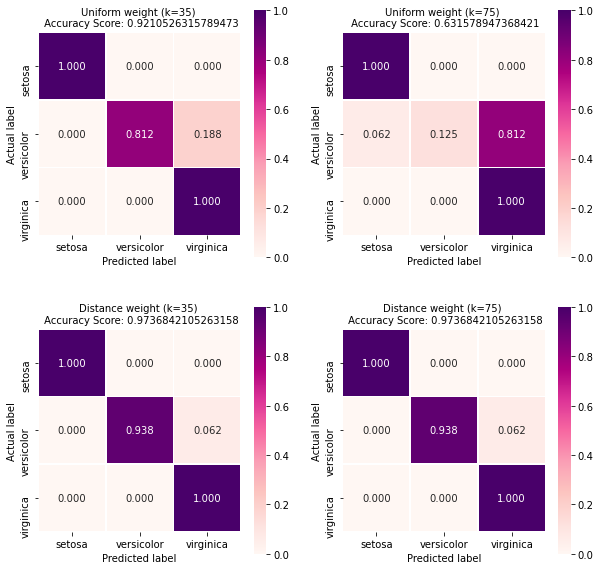

In [72]:
#Create KNN Classifier
uniform35 = KNeighborsClassifier(n_neighbors=35,weights='uniform') 
uniform75 = KNeighborsClassifier(n_neighbors=75,weights='uniform') 
distance35 = KNeighborsClassifier(n_neighbors=35,weights='distance') 
distance75 = KNeighborsClassifier(n_neighbors=75,weights='distance') 

#Train the models using the training sets
uniform35.fit(X_train, y_train)
uniform75.fit(X_train, y_train)
distance35.fit(X_train, y_train)
distance75.fit(X_train, y_train)

#Predict the response for test datasets
uniform35_predict = uniform35.predict(X_test)
uniform75_predict = uniform75.predict(X_test)
distance35_predict = distance35.predict(X_test)
distance75_predict = distance75.predict(X_test)

# Model Accuracy, how often is the classifier correct?
uniform35_score = uniform35.score(X_test,y_test)
uniform75_score = uniform75.score(X_test,y_test)
distance35_score = distance35.score(X_test,y_test)
distance75_score = distance75.score(X_test,y_test)

# Create confusion matrixes
uniform35_cm = confusion_matrix(y_test, uniform35_predict, normalize = 'true')
uniform75_cm = confusion_matrix(y_test, uniform75_predict, normalize = 'true')
distance35_cm = confusion_matrix(y_test, distance35_predict, normalize = 'true')
distance75_cm = confusion_matrix(y_test, distance75_predict, normalize = 'true')

#Plot confusion matrixes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
sns.heatmap(uniform35_cm, ax = ax1, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )
sns.heatmap(uniform75_cm, ax = ax2, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )
sns.heatmap(distance35_cm, ax = ax3, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )
sns.heatmap(distance75_cm, ax = ax4, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )

#Set labels
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('Actual label')
ax1.set_title('Uniform weight (k=35) \n Accuracy Score: {0}'.format(uniform35_score), size=10)
ax1.set_xticklabels(iris.target_names)
ax1.set_yticklabels(iris.target_names)
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
ax2.set_title('Uniform weight (k=75) \n Accuracy Score: {0}'.format(uniform75_score), size=10)
ax2.set_xticklabels(iris.target_names)
ax2.set_yticklabels(iris.target_names)
ax3.set_xlabel('Predicted label')
ax3.set_ylabel('Actual label')
ax3.set_title('Distance weight (k=35) \n Accuracy Score: {0}'.format(distance35_score), size=10)
ax3.set_xticklabels(iris.target_names)
ax3.set_yticklabels(iris.target_names)
ax4.set_xlabel('Predicted label')
ax4.set_ylabel('Actual label')
ax4.set_title('Distance weight (k=75) \n Accuracy Score: {0}'.format(distance75_score), size=10)
ax4.set_xticklabels(iris.target_names)
ax4.set_yticklabels(iris.target_names)

plt.show()

As one can see, the confusion matrix for the distance-based weight is the same while the uniform based differed. This more or less illustrates the same thing as the plot above however this shows 4 concert examples of this. Furthermore, this demonstrates that only versicolor is the one to get predicted wrongly, indicating that its points are probably less cluttered together then the other 2. One could argue that since it usually gets wrong assumed to be virginica it has to the same must be true for virginica, but since the accuracy is 100% across every confusion matrix the only conclusion is that virginica points are close together and versicolor is not, however the versicolor points are probably closer to virginica than setosa.

Lastly when comparing knn to logistic regression (2a) one could see that knn has a higher accuracy 97% (at least if we use distances weights which vastly outperforms uniform on higher k values) compared to logistic regression which only had a accuracy of 87%

## **Part 3**: Explain why it is important to use a separate test (and sometimes validation) set

Since when training a model, one usually tweaks it and for example removes outliers to improve accuracy. And let’s say that one was not to use a test set then the model after tweaking could theoretically achieve 100% accuracy on the set used. However, if one were to use it as a prediction model for another set the accuracy could be extremely low. Instead by using a test set one could tweak the model on the training set and the test it on test set. Then go back to the training set and tweak it further (which is basically a validation set, it seems that test and validation set are used somewhat lose). After a few iterations the model would then be able to more accurately predict data on both the test set and thus also new data.